In [14]:
%matplotlib inline
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [15]:
# set intial values
experimentFolderPath = r'D:\Bachelorarbeit\Object-Detection\experiments\test_set'
os.chdir(experimentFolderPath)
os.getcwd()

'D:\\Bachelorarbeit\\Object-Detection\\experiments\\test_set'

In [16]:
# set intial values
cascadeXMLs = ('trained_models\\cascade_cubes_standard.xml', 'trained_models\\cascade_balls_standard.xml')
testImagesPNGs = r'imgs_blurry\list.txt'
cascadePredTarget = 'cascade_preds_standard_on_blurry'
minimalObjectSize = 30

In [17]:
# load test images
imgs = []
with open(testImagesPNGs, 'r') as file:
    prefix = testImagesPNGs[:testImagesPNGs.rfind('\\')] # cut everything from last '\' on
    print(prefix)
    imgs = [os.path.join(prefix, line).replace('\n','') for line in file.readlines()]

imgs_blurry


In [18]:
# load models
cascadeDetectors = [cv2.CascadeClassifier(XML) for XML in cascadeXMLs]

# assert, that cascades have been loaded successfully
assert True not in [cascade.empty() for cascade in cascadeDetectors]

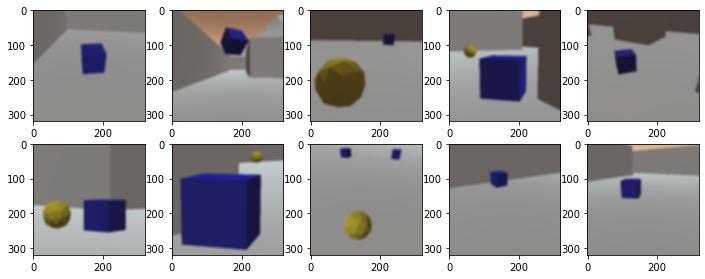

In [19]:
# show first ten images as sanity check
fig=plt.figure(figsize=(12, 4.5))
rows, columns = 2, 5
for i in range(columns*rows):
    img = cv2.imread(imgs[i])
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()

In [20]:
# get cascade predictions
preds_classifiers = [{}, {}]
for img in imgs:
    for i in range(len(cascadeDetectors)):
        img_loaded = cv2.imread(img)
        # one file for each image, listing preds like:
        # <class_id> <conf> <left> <top> <width> <height> (all absolute)
        bboxes, _, confs = cascadeDetectors[i].detectMultiScale3(img_loaded,
                                                                minSize=(minimalObjectSize,
                                                                         minimalObjectSize),
                                                                outputRejectLevels = True)
        if len(bboxes) > 0:
            img_name = img[img.rfind('/')+1:]
            preds = zip(confs, bboxes)
            line = ''
            for pred in preds:
                conf, x, y, w, h = pred[0][0], pred[1][0], pred[1][1], pred[1][2], pred[1][3]
                line += f'{i} {conf} {x} {y} {w} {h}\n'
            if not img_name in preds_classifiers[i].keys():
                preds_classifiers[i][img_name] = line
            else:
                preds_classifiers[i][img_name].append(line)
for i in range(len(preds_classifiers)):
    print(f'{len(preds_classifiers[i])} Bilder mit Objekten der Klasse {i} gefunden')

424 Bilder mit Objekten der Klasse 0 gefunden
555 Bilder mit Objekten der Klasse 1 gefunden


In [21]:
# merch both lists
preds_merched = {}
check = []
for key in preds_classifiers[0].keys():
    line = preds_classifiers[0][key]
    if key in preds_classifiers[1].keys():
        for box in preds_classifiers[1][key]:
            line+= box
    preds_merched[key] = line[:-1]
    check.append(key)
for key in preds_classifiers[1].keys():
    if key not in check:
        line = preds_classifiers[1][key]
        if key in preds_classifiers[0].keys():
            for box in preds_classifiers[1][key]:
                line += box
        preds_merched[key] = line[:-1]

In [22]:
# create target folder if not existend
if not os.path.exists(cascadePredTarget):
    os.makedirs(cascadePredTarget)
print(cascadePredTarget)

cascade_preds_standard_on_blurry


In [23]:
# save cascade predictions
for img_name in preds_merched.keys():
    path = os.path.join(cascadePredTarget, img_name.replace('imgs_blurry\\', '').replace('.png', '.txt'))
    with open(path, 'w+') as file:
        file.write(preds_merched[img_name])

In [34]:
# für yolo:
'''python ../../yolov3/detect.py --weights yolo_models/yolo_fixed.pt --source test_data/images_fixed --project test_data/yolo_preds_fixed_only --img-size 320 --save-txt --save-conf --nosave
'''
# im yolov3 Ordner

'python ../../yolov3/detect.py --weights yolo_models/yolo_fixed.pt --source test_data/images_fixed --project test_data/yolo_preds_fixed_only --img-size 320 --save-txt --save-conf --nosave\n'